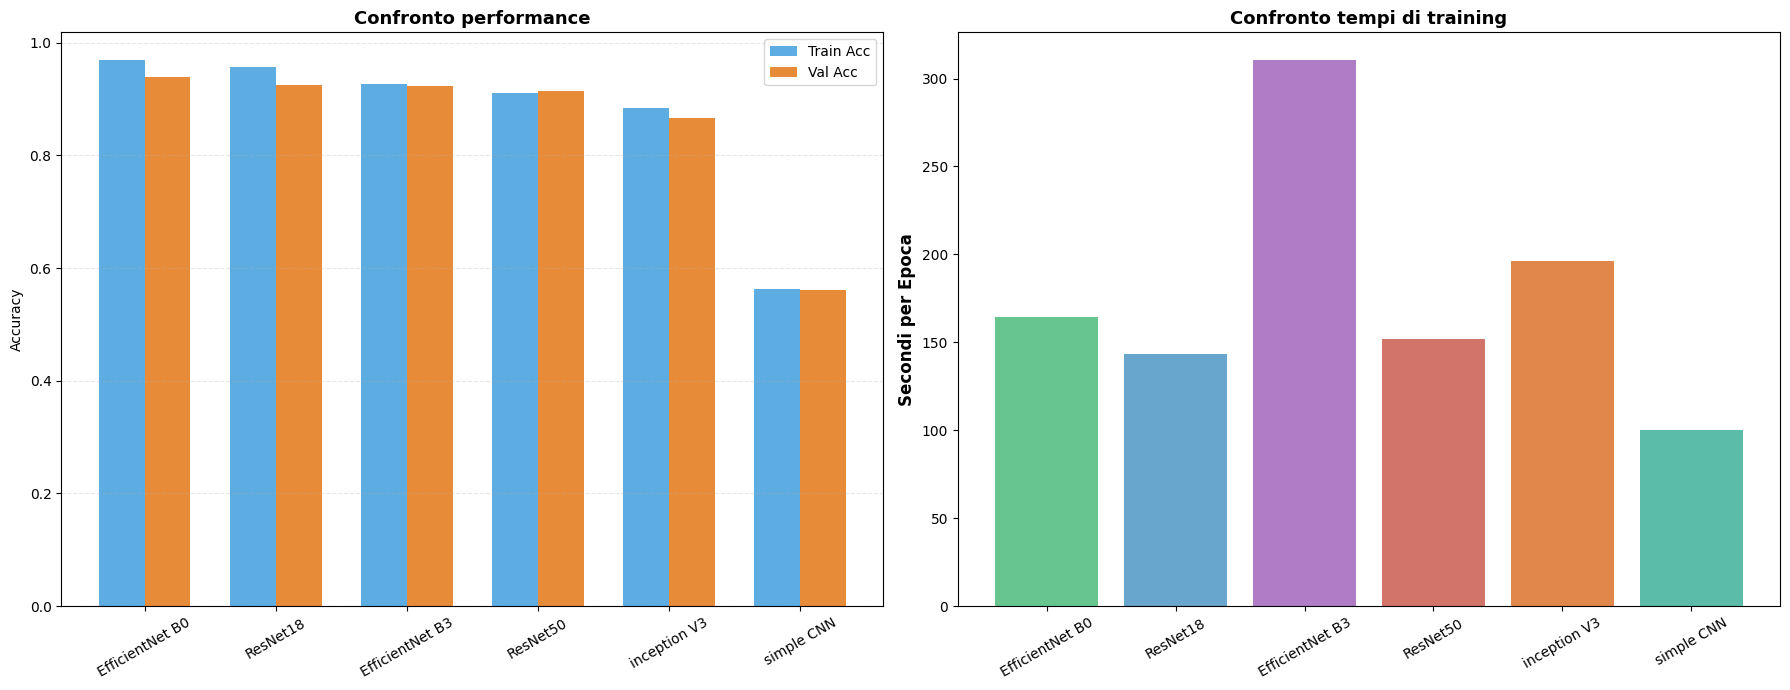

In [15]:
import matplotlib.pyplot as plt
import numpy as np

# 1. DATA PREPARATION
models_data = [
    {
        "name": "ResNet50", 
        "train_acc": 0.9112, 
        "val_acc": 0.9151, 
        "time_min": 63.18,
        "epochs": 25
    },
    {
        "name": "ResNet18", # da sistemare eseguendo su kaggle
        "train_acc": 0.9569, 
        "val_acc": 0.9246, 
        "time_min": 71.58,
        "epochs": 30
    },
    {
        "name": "EfficientNet B3", 
        "train_acc": 0.9262, 
        "val_acc": 0.9237, 
        "time_min": 72.5,
        "epochs": 14
    },
    {
        "name": "inception V3", 
        "train_acc": 0.8848, 
        "val_acc": 0.8657, 
        "time_min": 49.08,
        "epochs": 15
    },
    {
        "name": "simple CNN", 
        "train_acc": 0.5630, 
        "val_acc": 0.5615, 
        "time_min": 43.50,
        "epochs": 26
    },
    {
        "name": "EfficientNet B0", 
        "train_acc": 0.9701, 
        "val_acc": 0.9402, 
        "time_min": 79.59,
        "epochs": 29
    }
]

# Ordiniamo i modelli per accuratezza di validazione decrescente
models_data = sorted(models_data, key=lambda x: x['val_acc'], reverse=True)

names = [m["name"] for m in models_data]
train_accs = [m["train_acc"] for m in models_data]
val_accs = [m["val_acc"] for m in models_data]
total_times = [m["time_min"] for m in models_data]
epochs = [m["epochs"] for m in models_data]

# Calcoliamo il tempo medio per singola epoca (in secondi)
time_per_epoch_sec = [(m["time_min"] * 60) / m["epochs"] for m in models_data]

# 2. PLOTTING
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))
x = np.arange(len(names))
width = 0.35

# --- Grafico 1: Accuratezza (Ordinata) ---
ax1.bar(x - width/2, train_accs, width, label='Train Acc', color='#3498db', alpha=0.8)
ax1.bar(x + width/2, val_accs, width, label='Val Acc', color='#e67e22', alpha=0.9)
ax1.set_ylabel('Accuracy')
ax1.set_title('Confronto performance', fontsize=13, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(names, rotation=30)
ax1.legend()
ax1.grid(axis='y', linestyle='--', alpha=0.3)

colori = ['#27ae60', '#2980b9', '#8e44ad', '#c0392b', '#d35400', '#16a085']

# Barre: Tempo per singola epoca
bars = ax2.bar(x, time_per_epoch_sec, color=colori, alpha=0.7, label='Secondi per Epoca')
ax2.set_ylabel('Secondi per Epoca', fontsize=12, fontweight='bold')
ax2.tick_params(axis='y')

ax2.set_title('Confronto tempi di training', fontsize=13, fontweight='bold')
ax2.set_xticks(x)
ax2.set_xticklabels(names, rotation=30)

plt.tight_layout()
plt.show()